# DQN on LunarLander-v2

In [0]:
!pip install box2d-py
!pip install gym[Box_2D]
import Box2D

import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import random 

from collections import deque

Using TensorFlow backend.


In [0]:
# ENVIRONMENT
env_name = "LunarLander-v2"
env = gym.make(env_name)
memory = deque([], maxlen=100000)
gamma = 0.8
learning_rate = 0.85

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [0]:
# AGENT
class DqnAgent:
  def __init__(self):
    # initialize variables
    self.env = env
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.observation_dim = self.env.observation_space.shape[0]
    self.action_space = env.action_space
    
  # Execute the given action
  def step(self,state,epsilon):
    if random.uniform(0,1) < epsilon:
      self.q_values = model_1.predict(state)
      action = np.argmax(self.q_values[0])
    # Exploration
    else:
      action = self.action_space.sample()
    return action
  
  # Experience replay
  def experience_replay(self):
    batch = random.sample(memory, 32)
    for state, action, reward, next_state, terminate in batch:
      q_update = reward
      if not terminate:
        q_update = reward + self.gamma * np.max(model_2.predict(next_state)[0])
      target_q_update = model_1.predict(state)
      target_q_update[0][action] = q_update
      model_1.fit(state, target_q_update, epochs=1, verbose=0)
  
  # Update
  def update(self,next_state,action,reward):
    q_value = model_2.predict(next_state)
    self.q_values = model_1.predict(state)
    max_q_value = np.max(q_value)
    target_value = self.q_values
    target_value[0,action] = reward + self.gamma*max_q_value
    return target_value

In [0]:
# Define the model
model_1 = Sequential()
model_1.add(Dense(256, input_dim=8, activation='relu') )
model_1.add(Dense(4, input_dim=256, activation='relu') )
model_1.compile(optimizer=Adam(lr=0.001),loss='mse')

model_2 = Sequential()
model_2.add(Dense(256, input_dim=8, activation='relu') )
model_2.add(Dense(4, input_dim=256, activation='relu') )
model_2.set_weights(model_1.get_weights())

episode 0
total_average_reward -83
average_reward 0

 Rewards List Graph:


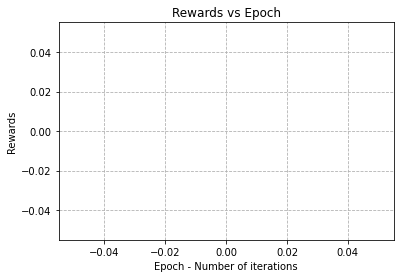


 Rewards List Graph:


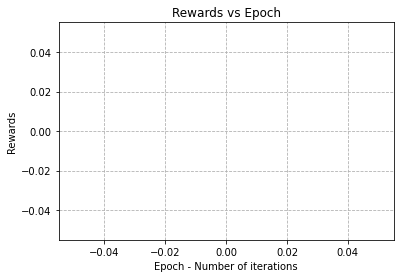

episode 100
total_average_reward -4886
average_reward -48

 Rewards List Graph:


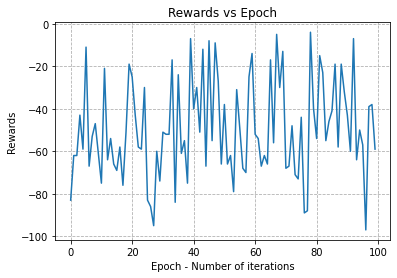


 Rewards List Graph:


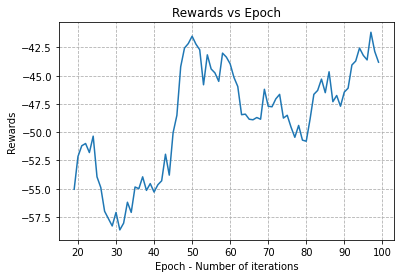

episode 200
total_average_reward -6577
average_reward -65

 Rewards List Graph:


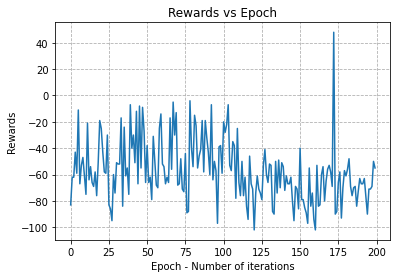


 Rewards List Graph:


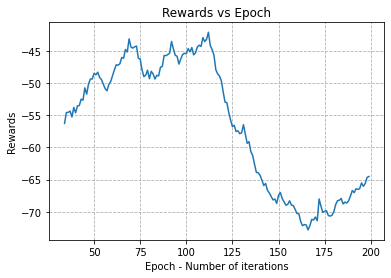

episode 300
total_average_reward -6620
average_reward -66

 Rewards List Graph:


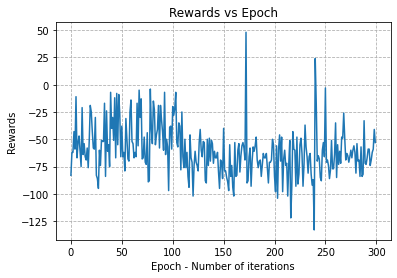


 Rewards List Graph:


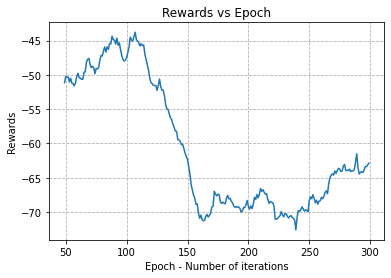

episode 400
total_average_reward -6363
average_reward -63

 Rewards List Graph:


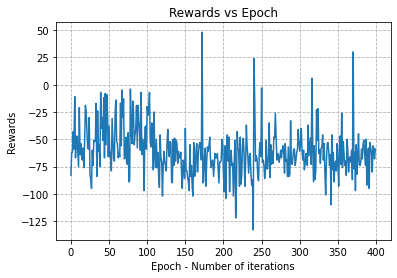


 Rewards List Graph:


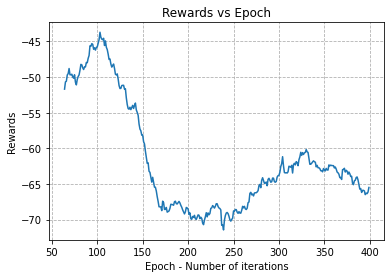


 Rewards List Graph:


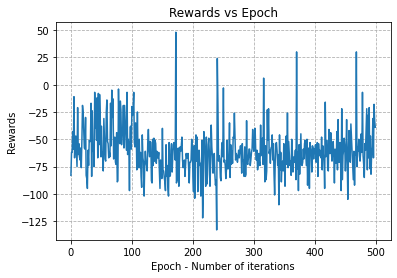


 Rewards List Graph:


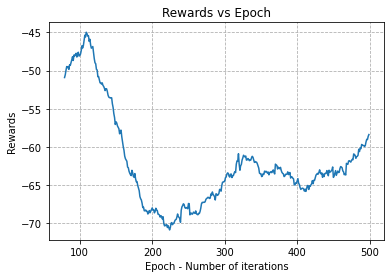


 Epsilons List Graph:


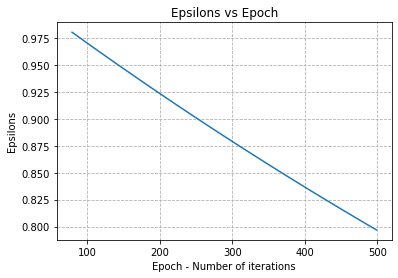

In [0]:
# Training

# Get the training agent and required parameters
dqn_agent = DqnAgent()
dqn_total_rewards_list_env2 = []
epsilons_list = []
epochs = 500
window = 5
epsilon = 1
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.0005
total_average_reward = 0

# Main Algo
for counter in range(epochs):
  state = env.reset()
  state = np.reshape(state, [1, 8])

  total_reward = 0
  terminate = False
  while terminate == False:  
    action=dqn_agent.step(state, epsilon)
    next_state,reward,terminate,info = env.step(action)
    reward=np.sign(reward)
    next_state = np.reshape(next_state, [1, 8])
    target_value = dqn_agent.update(next_state,action,reward)
    model_1.fit(state, target_value, verbose=False)
    total_reward += reward
    total_average_reward += reward
    memory.append((state, action, reward, next_state, terminate))
    state = next_state
  
  if len(memory) > 32 :
    dqn_agent.experience_replay()
  if counter % 10 == 0:
    model_2.set_weights(model_1.get_weights())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*counter)
  
  if counter % 100 == 0:
    print ("episode %d"%counter)
    print ("total_average_reward %d"%total_average_reward)
    average_reward = total_average_reward/100
    total_average_reward = 0
    print ("average_reward %d"%average_reward)
    
    print('\n Rewards List Graph:')
    plt.plot(dqn_total_rewards_list_env2)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()

    df = pd.DataFrame(dqn_total_rewards_list_env2, columns=['r'])
    rolling_mean = df['r'].rolling(window=window).mean()
    print('\n Rewards List Graph:')
    plt.plot(rolling_mean)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()
    window = window + 15
  # print(total_reward)
  dqn_total_rewards_list_env2.append(total_reward)
  epsilons_list.append(epsilon)

# Plot final graphs
print('\n Rewards List Graph:')
plt.plot(dqn_total_rewards_list_env2)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(dqn_total_rewards_list_env2, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Rewards List Graph:')
plt.plot(rolling_mean)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(epsilons_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Epsilons List Graph:')
plt.plot(rolling_mean)
plt.title("Epsilons vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Epsilons')
plt.grid(ls='--')
plt.show()

# DDQN on LunarLander-v2

In [0]:
!pip install box2d-py
!pip install gym[Box_2D]
import Box2D

import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import random
from collections import deque

In [0]:
# ENVIRONMENT

# global variables
env_name = "LunarLander-v2"
env = gym.make(env_name)
memory = deque([], maxlen=100000)
gamma = 0.8
learning_rate = 0.85

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [0]:
# AGENT

class DqnAgent:
  def __init__(self):
    # initialize variables
    self.env = env
    self.learning_rate = learning_rate
    self.gamma = gamma
    self.observation_dim = self.env.observation_space.shape[0]
    self.action_space = env.action_space
    
  # Execute the given action
  def step(self,state,epsilon):
    if random.uniform(0,1) < epsilon:
      self.q_values = model_1.predict(state)
      action = np.argmax(self.q_values[0])
    # Exploration
    else:
      action = self.action_space.sample()
    return action
  
  # Experience Replay
  def experience_replay(self):
    batch = random.sample(memory, 32)
    for state, action, reward, next_state, terminate in batch:
      q_update = reward
      if not terminate:
        max_q_update = np.argmax(model_1.predict(next_state))
        q_update = reward + self.gamma * (model_2.predict(next_state)[0][max_q_update])
      target_q_update = model_1.predict(state)
      target_q_update[0][action] = q_update
      model_1.fit(state, target_q_update, epochs=1, verbose=0)
  
  # Update
  def update(self,next_state,action,reward):
    q_value = model_2.predict(next_state)
    self.q_values = model_1.predict(state)
    max_q_value = np.max(q_value)
    target_value = self.q_values
    target_value[0,action] = reward + self.gamma*max_q_value
    return target_value

In [0]:
# Define the model
model_1 = Sequential()
model_1.add(Dense(256, input_dim=8, activation='relu') )
model_1.add(Dense(4, input_dim=256, activation='relu') )
model_1.compile(optimizer=Adam(lr=0.001),loss='mse')

model_2 = Sequential()
model_2.add(Dense(256, input_dim=8, activation='relu') )
model_2.add(Dense(4, input_dim=256, activation='relu') )
model_2.set_weights(model_1.get_weights())

episode 0

 Rewards List Graph:


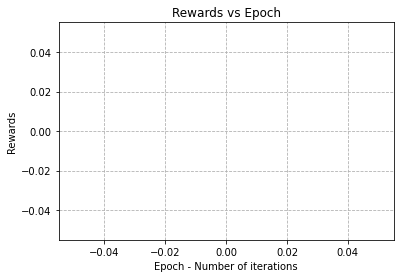

episode 100

 Rewards List Graph:


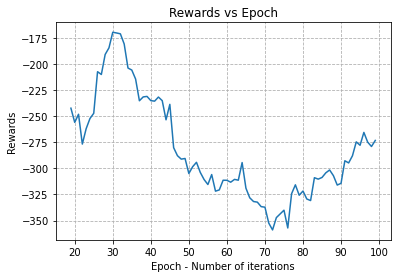

episode 200

 Rewards List Graph:


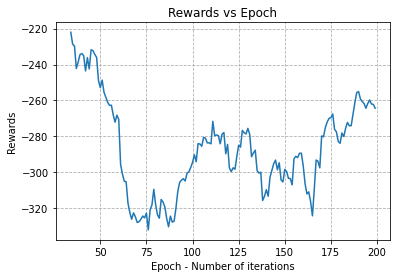

episode 300

 Rewards List Graph:


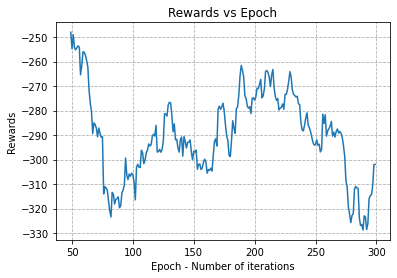

episode 400

 Rewards List Graph:


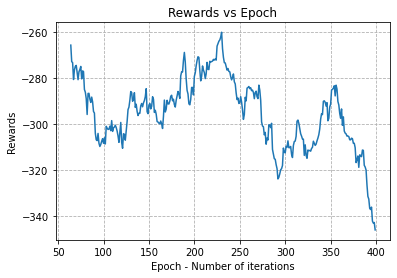

episode 500

 Rewards List Graph:


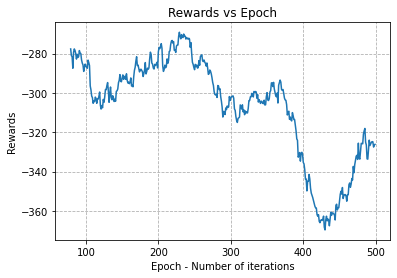

episode 600

 Rewards List Graph:


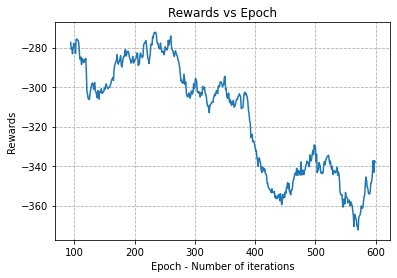

episode 700

 Rewards List Graph:


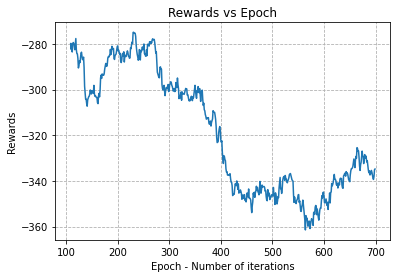

episode 800

 Rewards List Graph:


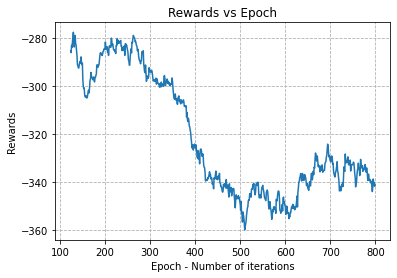

episode 900

 Rewards List Graph:


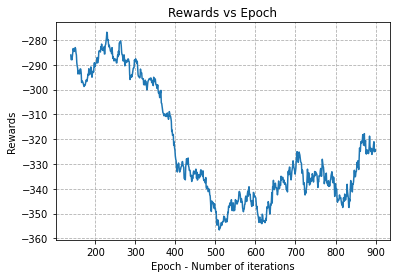


 Rewards List Graph:


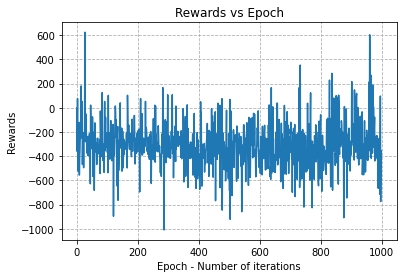


 Rewards List Graph:


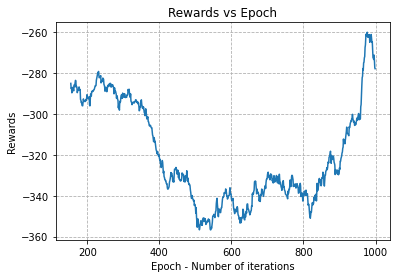


 Epsilons List Graph:


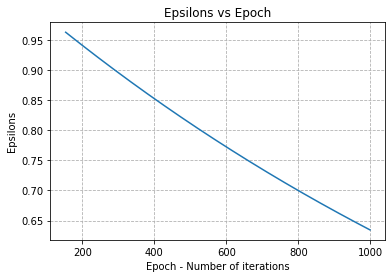

In [0]:
# Training

# get training agent and initialize required parameters
dqn_agent = DqnAgent()
double_dqn_total_rewards_list_env2 = []
epsilons_list = []
epochs = 1000
window = 5
epsilon = 1
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.0005

# Main algo
for counter in range(epochs):
  state = env.reset()
  state = np.reshape(state, [1, 8])
  total_reward = 0
  terminate = False
  
  while terminate == False:  
    action=dqn_agent.step(state,epsilon)
    next_state,reward,terminate,info = env.step(action)
    total_reward += reward
    if terminate:
      reward = 210 + total_reward
    else:
      reward=np.sign(reward)
    total_reward += reward
    next_state = np.reshape(next_state, [1, 8])
    target_value = dqn_agent.update(next_state,action,reward)
    model_1.fit(state, target_value, verbose=False)
    memory.append((state, action, reward, next_state, terminate))
    state = next_state
    
  if len(memory) > 32 :
    dqn_agent.experience_replay()
  if counter % 10 == 0:
    model_2.set_weights(model_1.get_weights())
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*counter)
  
  if counter % 100 == 0:
    print ("episode %d"%counter)   
    df = pd.DataFrame(double_dqn_total_rewards_list_env2, columns=['r'])
    rolling_mean = df['r'].rolling(window=window).mean()
    print('\n Rewards List Graph:')
    plt.plot(rolling_mean)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()
    window = window + 15
  # print(total_reward)
  double_dqn_total_rewards_list_env2.append(total_reward)
  epsilons_list.append(epsilon)

# Plot final graphs
print('\n Rewards List Graph:')
plt.plot(double_dqn_total_rewards_list_env2)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(double_dqn_total_rewards_list_env2, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Rewards List Graph:')
plt.plot(rolling_mean)
plt.title("Rewards vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Rewards')
plt.grid(ls='--')
plt.show()

df = pd.DataFrame(epsilons_list, columns=['r'])
rolling_mean = df['r'].rolling(window=window).mean()
print('\n Epsilons List Graph:')
plt.plot(rolling_mean)
plt.title("Epsilons vs Epoch")
plt.xlabel('Epoch - Number of iterations')
plt.ylabel('Epsilons')
plt.grid(ls='--')
plt.show()

# PPO on LunarLander-v2

In [0]:
!pip install box2d-py
!pip install gym[Box_2D]

import numpy as np
import gym
from keras.models import Model
from keras.layers import Input, Dense
from keras import backend as K
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import Box2D


In [0]:
# Initialize environment and global variables
env = 'LunarLander-v2'
episodes = 6000
clipping_loss = 0.2
epochs = 10
noise = 1.0 # Exploration noise
gamma = 0.9
window = 10

buffer_size = 2048
batch_size = 256
number_of_actions = 4
number_of_states = 8
hidden_layer_nodes = 256
number_of_layers = 2
entropy_loss = 0.005
lr = 0.0001

dummy_action, dummy_value = np.zeros((1, number_of_actions)), np.zeros((1, 1))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
output (Dense)               (None, 4)                 1028      
Total params: 69,124
Trainable params: 69,124
Non-trainable params: 0
_________________________________________________________________
action_space =  Discrete(4) observation_space =  Box(8,)


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


reward sum
-46492.12800351511
reward sum
-47838.88532228049
reward sum
-74698.31094168818
reward sum
-51157.4017558422
reward sum
-40859.60969952723
reward sum
-43944.46540769693
reward sum
-51859.1822628613
reward sum
-44618.76629579995
reward sum
-38580.69032224432
reward sum
-28000.5746833875
reward sum
-48003.72932737689
reward sum
-44382.17279783623
reward sum
-43510.781513519876
reward sum
-40161.12326057613
reward sum
-41544.995163222266
reward sum
-43619.93313416533
reward sum
-42064.90229570173
reward sum
-43766.559418234676
reward sum
-40827.352070124914
reward sum
-38122.96240819948
reward sum
-42029.845678745754
reward sum
-38439.93057660016
reward sum
-40436.60701649805
reward sum
-46345.0868785365
reward sum
-41476.97908363949
reward sum
-37867.77067060406
reward sum
-41163.90185699411
reward sum
-45478.20503671214
reward sum
-46398.08876437001
reward sum
-49843.67319773115
reward sum
-37983.86037876409
reward sum
-37045.390416355745
reward sum
-36121.97750133925
reward s

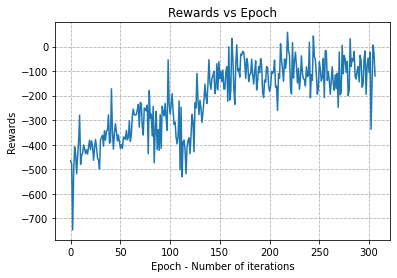

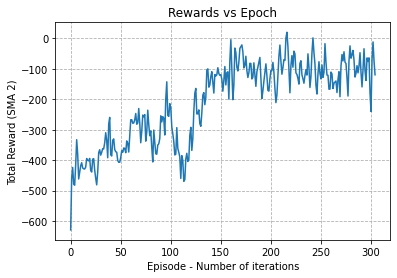

In [0]:
class Agent:
  # Initialize agent
  def __init__(self):
    self.critic = self.criticModel()
    self.actor = self.actorModel()
    self.env = gym.make(env)
    print('action_space = ', self.env.action_space, 'observation_space = ', self.env.observation_space)
    self.episode = 0
    self.observation = self.env.reset()
    self.select_best_action = False
    self.reward = []
    self.reward_over_time = []
    self.gradient_steps = 0
    self.total_actor_loss = []
    self.total_critic_loss = []
    self.ppo_total_reward = []

  # PPO - loss function
  def ppoLoss(self,advantage, old_prediction):
    def loss(y_true, y_pred):
      pi_theta = K.sum(y_true * y_pred, axis=-1)
      old_pi_theta = K.sum(y_true * old_prediction, axis=-1)
      r = pi_theta/(old_pi_theta)
      return -K.mean(K.minimum(r * advantage, K.clip(r, min_value=1 - clipping_loss, max_value=1 + clipping_loss) * advantage) + 
                    entropy_loss * -(pi_theta * K.log(pi_theta)))
    return loss

  # Actor model
  def actorModel(self):
    state_input = Input(shape=(number_of_states,))
    advantage = Input(shape=(1,))
    old_prediction = Input(shape=(number_of_actions,))
    x = Dense(hidden_layer_nodes, activation='tanh')(state_input)
    for _ in range(number_of_layers - 1):
      x = Dense(hidden_layer_nodes, activation='tanh')(x)
    out_actions = Dense(number_of_actions, activation='softmax', name='output')(x)

    model1 = Model(inputs=[state_input, advantage, old_prediction], outputs=[out_actions])
    model1.compile(optimizer=Adam(lr=lr),
                  loss=[self.ppoLoss(
                      advantage=advantage,
                      old_prediction=old_prediction)])
    model1.summary()

    return model1

  # Critic model
  def criticModel(self):
    state_input = Input(shape=(number_of_states,))
    x = Dense(hidden_layer_nodes, activation='tanh')(state_input)
    for _ in range(number_of_layers - 1):
      x = Dense(hidden_layer_nodes, activation='tanh')(x)
    out_value = Dense(1)(x)

    model2 = Model(inputs=[state_input], outputs=[out_value])
    model2.compile(optimizer=Adam(lr=lr), loss='mse')
    return model2

  # Reset environment
  def resetEnvironment(self):
    self.episode += 1
    if self.episode % 100 == 0:
      self.select_best_action = True
    else:
      self.select_best_action = False
    self.observation = self.env.reset()
    self.reward = []
    self.window = 2

  # Select Action
  def getAction(self):
    p = self.actor.predict([self.observation.reshape(1, number_of_states), dummy_value, dummy_action])
    if self.select_best_action is False:
      action = np.random.choice(number_of_actions, p=np.nan_to_num(p[0])) # random action
    else:
      action = np.argmax(p[0]) # action based on actor (selecting best action)
    action_matrix = np.zeros(number_of_actions)
    action_matrix[action] = 1
    return action, action_matrix, p

  # Update Reward
  def updateReward(self):
    for j in range(len(self.reward) - 2, -1, -1):
      self.reward[j] += self.reward[j + 1] * gamma

  # Update Agent
  def updateAgent(self):
    batch = [[], [], [], []]
    temp_data = [[], [], []]
    while len(batch[0]) < buffer_size:
      action, action_matrix, predicted_action = self.getAction()
      observation, reward, done, info = self.env.step(action)
      self.reward.append(reward)

      temp_data[0].append(self.observation)
      temp_data[1].append(action_matrix)
      temp_data[2].append(predicted_action)
      self.observation = observation

      if done:
        self.updateReward()
        if self.select_best_action is False:
          for i in range(len(temp_data[0])):
            obs, action, pred = temp_data[0][i], temp_data[1][i], temp_data[2][i]
            r = self.reward[i]
            batch[0].append(obs)
            batch[1].append(action)
            batch[2].append(pred)
            batch[3].append(r)
        temp_data = [[], [], []]
        self.resetEnvironment()

    obs, action, pred, reward = np.array(batch[0]), np.array(batch[1]), np.array(batch[2]), np.reshape(np.array(batch[3]), (len(batch[3]), 1))
    pred = np.reshape(pred, (pred.shape[0], pred.shape[2]))
    return obs, action, pred, reward

  # Main Logic
  def run(self):
    while self.episode < episodes:
      obs, action, pred, reward = self.updateAgent()
      print('reward sum')
      print(np.array(reward).sum())
      self.ppo_total_reward.append(np.array(reward).sum()/100)

      obs, action, pred, reward = obs[:buffer_size], action[:buffer_size], pred[:buffer_size], reward[:buffer_size]
      old_prediction = pred
      pred_values = self.critic.predict(obs)

      advantage = reward - pred_values

      actor_loss = self.actor.fit([obs, advantage, old_prediction], [action], batch_size=batch_size, shuffle=True, epochs=epochs, verbose=False)
      critic_loss = self.critic.fit([obs], [reward], batch_size=batch_size, shuffle=True, epochs=epochs, verbose=False)
      
      self.total_actor_loss.append(actor_loss.history['loss'][-1])
      self.total_critic_loss.append(critic_loss.history['loss'][-1])

      self.gradient_steps += 1
    
    print('self.total_actor_loss')
    print(self.total_actor_loss)
    print('self.total_critic_loss')
    print(self.total_critic_loss)
    print('self.ppo_total_reward')
    print(self.ppo_total_reward)
    
    # Plot final graphs
    print('\n Rewards List Graph:')
    plt.plot(self.ppo_total_reward)
    plt.title("Rewards vs Epoch")
    plt.xlabel('Epoch - Number of iterations')
    plt.ylabel('Rewards')
    plt.grid(ls='--')
    plt.show()

    plt.plot([np.mean(self.ppo_total_reward[tr:tr+self.window]) for tr in range(self.window, len(self.ppo_total_reward))])
    plt.title("Rewards vs Epoch")
    plt.xlabel('Episode - Number of iterations')
    plt.ylabel('Total Reward (SMA 2)')
    plt.grid(ls='--')
    plt.show()
    self.window = self.window + 2

  def getTotalReward(self):
    return self.ppo_total_reward

ag = Agent()
ag.run()
ppo_total_reward_env2 = ag.getTotalReward()

# Comparison of Graphs

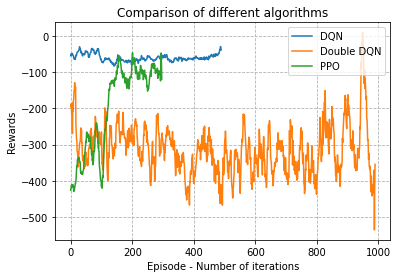

In [0]:
plt.plot([np.mean(dqn_total_rewards_list_env2[tr:tr+window]) for tr in range(window, len(dqn_total_rewards_list_env2))],label="DQN")
plt.plot([np.mean(double_dqn_total_rewards_list_env2[tr:tr+window]) for tr in range(window, len(double_dqn_total_rewards_list_env2))],label="Double DQN")
plt.plot([np.mean(ppo_total_reward_env2[tr:tr+window]) for tr in range(window, len(ppo_total_reward_env2))],label="PPO")

plt.title("Comparison of different algorithms")
plt.xlabel('Episode - Number of iterations')
plt.ylabel('Rewards')
plt.legend(loc='best')
plt.grid(ls='--')
plt.show()